# Impartial Culture With Error Term

In [1]:
import sympy
import numpy as np
from actinvoting import *

In [2]:
m = 3

In [3]:
session = WorkSessionICCondorcet(m=3)

## Runtimes

In [4]:
%%timeit
equivalent_probas = session.asymptotics(n=100)

51.7 μs ± 420 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [5]:
exact_probas = exact_batch(session=session, ns=[100], n_jobs=1, force_recompute=True)

run_time_str='15s'


In [6]:
monte_carlo_probas = monte_carlo_batch(session=session, ns=[100], n_samples=10000, n_jobs=1, force_recompute=True)

run_time_str='4s'


## Plot

In [7]:
ns_equivalent_probas = list(range(2, 101))
ns_exact_probas = list(range(2, 101))
ns_monte_carlo_probas = list(range(2, 101))
n_samples = 10000
n_jobs = -1

In [8]:
equivalent_probas = [session.asymptotics(n=n) for n in ns_equivalent_probas]

In [9]:
monte_carlo_probas = monte_carlo_batch(session=session, ns=ns_monte_carlo_probas, n_samples=n_samples, n_jobs=n_jobs)

Loading IC_self.m=3_c=2_hash(ns)=-7142264137129868933_n_samples=10000_mc.pkl


In [10]:
exact_probas = exact_batch(session=session, ns=ns_exact_probas, n_jobs=n_jobs)

Loading IC_self.m=3_c=2_hash(ns)=-7142264137129868933_exact.pkl


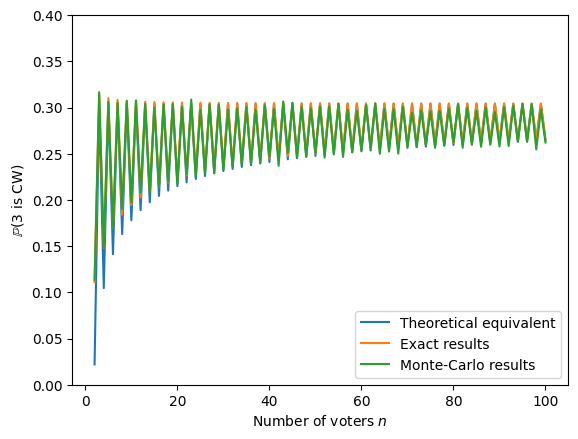

In [11]:
plot_simu_and_theo(
    equivalent_probas=equivalent_probas, monte_carlo_probas=monte_carlo_probas, exact_probas=exact_probas,
    ns_equivalent_probas=ns_equivalent_probas, ns_monte_carlo_probas=ns_monte_carlo_probas, ns_exact_probas=ns_exact_probas,
    log_scale=False, xmax=.4, legend_loc='lower right', y_label=r"$\mathbb{P}(3 \text{ is CW})$", file_name='ic_3_with_error.tex', verbose=False
)